# Customer Segmentation

Construction of customer segmentation with a focus on value pyramid: Recency, Frequency and Value

> With IGR outlier remover method.

### Import Librarys

In [1]:
# Data Analysis Step
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# plot parameters
%matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

# outliers with mahalanobis
from scipy.spatial import distance


### Import Dataset 

dataset from EAD part

In [2]:
# dataset from the Excel file 

dataset = pd.read_csv('../output/online_retail_ead.csv',)


In [3]:
df = dataset.copy()

In [4]:
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [5]:
def summary(df):
    """
    Display a summary of a DataFrame.

    This function displays the first few rows of the DataFrame, basic information about the DataFrame's structure,
    and summary statistics including percentiles.

    Parameters:
    df (DataFrame): The pandas DataFrame to be summarized.

    Returns:
    None
    """

    display(f'Rows: {df.shape[0]}; Columns: {df.shape[1]}')
    display(df.head())
    print('-' * 100)
    display(df.info())
    print('-' * 100)
    display(df.describe([0.01, 0.25, 0.50, 0.75, 0.99]))

In [6]:
summary(df)

'Rows: 400947; Columns: 9'

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400947 entries, 0 to 400946
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoice      400947 non-null  int64  
 1   stockcode    400947 non-null  object 
 2   description  400947 non-null  object 
 3   quantity     400947 non-null  int64  
 4   invoicedate  400947 non-null  object 
 5   price        400947 non-null  float64
 6   customer_id  400947 non-null  float64
 7   country      400947 non-null  object 
 8   sales        400947 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.5+ MB


None

----------------------------------------------------------------------------------------------------


,invoice,quantity,price,customer_id,sales
count,400947.000000,400947.000000,400947.000000,400947.000000,400947.000000
mean,514730.974393,13.768523,3.305571,15361.454639,21.943633
std,14090.832712,97.639816,35.046376,1680.669487,77.755308
min,489434.000000,1.000000,0.000000,12346.000000,0.000000
1%,489868.000000,1.000000,0.290000,12433.000000,0.650000
25%,502751.000000,2.000000,1.250000,13985.000000,5.000000
50%,515192.000000,5.000000,1.950000,15311.000000,12.500000
75%,527065.000000,12.000000,3.750000,16805.000000,19.500000
99%,537623.000000,144.000000,14.950000,18196.000000,202.662000
max,538171.000000,19152.000000,10953.500000,18287.000000,15818.400000


## 1 - Calculate Recency, Frequency, and Value:

**RFM (Recency, Frequency, Monetary Value)** analysis is a customer segmentation technique that uses past purchase behaviour to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

**RECENCY (R):** Days since last purchase

**FREQUENCY (F):** Total number of purchases

**MONETARY VALUE (M):** Total money this customer spent.

![RFM Analysis](../img/rmf_analysis.png)

### RFM Table

In [7]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

In [8]:
# last order date of the data frame
last_order_date = df['invoicedate'].max()

# RFM data frame
df_rfm = df.groupby('customer_id').agg({
    'invoicedate': lambda day: (last_order_date - day.max()).days,  #  Recency (number of days since the last purchase)
    'invoice': lambda num: len(num),  #  Frequency (total number of purchases)
    'sales': lambda price: price.sum()  # Monetary (total monetary value of purchases)  
})

df_rfm.columns = ['Recency','Frequency','Monetary']

df_rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
12346.0,164,33,372.86
12347.0,2,71,1323.32
12348.0,73,20,222.16
12349.0,42,102,2671.14
12351.0,10,21,300.93


### RFM Score

The provided code is used to create RFM (Recency, Frequency, Monetary) scores and an overall RFM score for customer segmentation. 

RFM analysis numerically scale each of these three categories for each customer 1 to 5. This is the higher the number, the better the result. The "Best" customer would receive a top score in every category.

***pd.qcut()*** is used to perform quantile-based discretization of the Recency, Frequency, and Monetary scores into five segments each, labeled with values from 1 to 5. These segments will represent the relative ranking of customers for each of the three metrics.

In [9]:
df_rfm["R_Score"]  = pd.qcut(df_rfm['Recency'], 5, [1, 2, 3, 4, 5])
df_rfm["F_Score"]  = pd.qcut(df_rfm['Frequency'],5, [1, 2, 3, 4, 5])
df_rfm["M_Score"]  = pd.qcut(df_rfm['Monetary'], 5, [1, 2, 3, 4, 5])


# sort data frame by Recency
df_rfm = df_rfm.sort_values(by='R_Score', ascending=False)
# concatenate the r, f, m score as string because is a categorical data for better understanding of the customers 
df_rfm["RFM_Score"] = df_rfm["R_Score"].astype(str) + df_rfm["F_Score"].astype(str) + df_rfm["M_Score"].astype(str)

summary(df_rfm)

'Rows: 4314; Columns: 7'

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
customer_id,,,,,,,
14378.0,256,9,131.25,5,1,1,511
16944.0,244,7,101.36,5,1,1,511
15112.0,246,7,209.40,5,1,1,511
13445.0,261,7,241.90,5,1,1,511
15109.0,214,20,498.15,5,2,2,522


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 4314 entries, 14378.0 to 15350.0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    4314 non-null   int64   
 1   Frequency  4314 non-null   int64   
 2   Monetary   4314 non-null   float64 
 3   R_Score    4314 non-null   category
 4   F_Score    4314 non-null   category
 5   M_Score    4314 non-null   category
 6   RFM_Score  4314 non-null   object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 181.8+ KB


None

----------------------------------------------------------------------------------------------------


,Recency,Frequency,Monetary
count,4314.000000,4314.000000,4314.000000
mean,90.269124,92.940890,2039.460766
std,96.943482,198.883579,8909.797773
min,0.000000,1.000000,0.000000
1%,0.000000,1.000000,39.956500
25%,17.000000,18.000000,307.105000
50%,52.000000,43.000000,700.405000
75%,135.000000,100.000000,1713.297500
99%,367.000000,677.000000,20003.399800
max,373.000000,5568.000000,349164.350000


### 2 - Segment Customers

1. **Champions:** Bought recently, buy often and spend the most
2. **Loyal customers:** Buy on a regular basis. Responsive to promotions.
3. **Potential loyalist:** Recent customers with average frequency.
4. **Recent customers:** Bought most recently, but not often.
5. **Promising:** Recent shoppers, but haven’t spent much.
6. **Needs attention:** Above average recency, frequency and monetary values. May not have bought very recently though.
7. **About to sleep:** Below average recency and frequency. Will lose them if not reactivated.
8. **At risk:** Some time since they’ve purchased. Need to bring them back!
9. **Can’t lose them:** Used to purchase frequently but haven’t returned for a long time.
10. **Hibernating:** Last purchase was long back and low number of orders. May be lost.

![RFM Segementation](../img/rm_r_x_fm.jpg)

In [10]:
# calc FM_Score
df_rfm['FM_Score'] = round((df_rfm['F_Score'].astype(int) + df_rfm['M_Score'].astype(int)) / 2)

df_rfm['FM_Score'].unique()

array([1., 2., 3., 4., 5.])

In [11]:
# create the R(FM_Score)
df_rfm['R(FM)_Score'] = df_rfm['R_Score'].astype(str) + df_rfm['FM_Score'].astype(str)

# remove decimal
df_rfm['R(FM)_Score'] = df_rfm['R(FM)_Score'].str.replace('.0', '', regex=False) 

df_rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,FM_Score,R(FM)_Score
customer_id,,,,,,,,,
14378.0,256,9,131.25,5,1,1,511,1.0,51
16944.0,244,7,101.36,5,1,1,511,1.0,51
15112.0,246,7,209.40,5,1,1,511,1.0,51
13445.0,261,7,241.90,5,1,1,511,1.0,51
15109.0,214,20,498.15,5,2,2,522,2.0,52


In [12]:
# df_rfm['R(FM)_Score'].unique()

# convert to string
df_rfm['R(FM)_Score'] = df_rfm['R(FM)_Score'].astype(str)
df_rfm['R(FM)_Score'].dtype

dtype('O')

In [13]:
# segmentation map
# regex R[1-5], FM[1-5]
seg_map = {
    r'11': 'Lost',
    r'12': 'Hibernating',
    r'13': 'About to Sleep',
    r'14': 'Promising',
    r'15': 'New Customers',
    r'21': 'At Risk',
    r'22': 'Need Attention',
    r'23': 'Potential Loyalist',
    r'24': "Can't Lose Them",
    r'25': 'Loyal Customers',
    r'31': 'Needs Attention',
    r'32': 'About to Sleep',
    r'33': 'At Risk',
    r'34': 'Promising',
    r'35': 'New Customers',
    r'41': 'At Risk',
    r'42': 'About to Sleep',
    r'43': 'Promising',
    r'44': "Can't Lose Them",
    r'45': 'Loyal Customers',
    r'51': 'Champions',
    r'52': 'Champions',
    r'53': 'Champions',
    r'54': 'Champions',
    r'55': 'Champions'
}

In [14]:
def apply_segmentation(df, column_name, seg_map):
    """
    Apply segmentation to a DataFrame based on a given column and segmentation map.

    Parameters:
        df (DataFrame): The DataFrame to segment.
        column_name (str): The name of the column to be segmented.
        seg_map (dict): A dictionary containing regular expressions as keys and segment names as values.

    Returns:
        DataFrame: The original DataFrame with an additional 'Segment' column.
    """
    # Check if the specified column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")

    # Apply the mapping function to create a new 'Segment' column
    df['RFM_Segment'] = df[column_name].astype(str).replace(seg_map, regex=True)
    
    return df

In [15]:
# apply function to create a new 'RFM_Class' column
df_rfm = apply_segmentation(df_rfm, 'R(FM)_Score', seg_map)

df_rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,FM_Score,R(FM)_Score,RFM_Segment
customer_id,,,,,,,,,,
14378.0,256,9,131.25,5,1,1,511,1.0,51,Champions
16944.0,244,7,101.36,5,1,1,511,1.0,51,Champions
15112.0,246,7,209.40,5,1,1,511,1.0,51,Champions
13445.0,261,7,241.90,5,1,1,511,1.0,51,Champions
15109.0,214,20,498.15,5,2,2,522,2.0,52,Champions


In [16]:
df_rfm['RFM_Segment'].unique()

array(['Champions', 'Loyal Customers', 'About to Sleep', 'Promising',
       "Can't Lose Them", 'At Risk', 'New Customers', 'Needs Attention',
       'Need Attention', 'Potential Loyalist', 'Hibernating', 'Lost'],
      dtype=object)

### R(FM) Segmentation readily answers

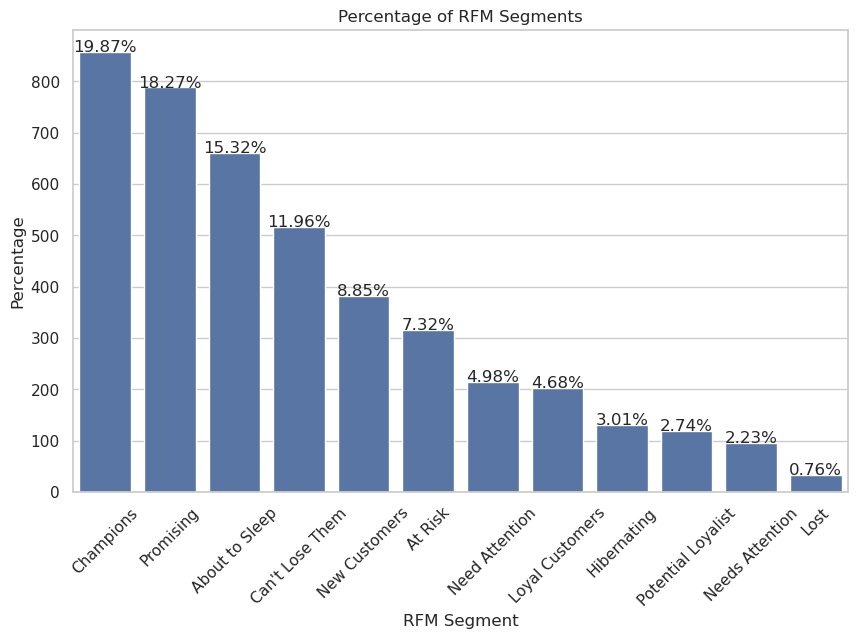

In [17]:
# create a countplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(data=df_rfm, x='RFM_Segment', order=df_rfm['RFM_Segment'].value_counts().index)

# display percentage on top of each bar
total = len(df_rfm)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f"{height/total*100:.2f}%", ha="center")

# pie char
plt.title("Percentage of RFM Segments")
plt.xlabel("RFM Segment")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

**Who are my best customers?**(Champions)

In [18]:
df_rfm[df_rfm['RFM_Segment'] == 'Champions'].sort_values('M_Score', ascending=False).head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,FM_Score,R(FM)_Score,RFM_Segment
customer_id,,,,,,,,,,
12671.0,241,45,2622.481,5,3,5,535,4.0,54,Champions
17230.0,198,148,5750.080,5,5,5,555,5.0,55,Champions
15760.0,265,2,13916.340,5,1,5,515,3.0,53,Champions
18051.0,269,55,2282.280,5,3,5,535,4.0,54,Champions
18052.0,199,16,10877.180,5,2,5,525,4.0,54,Champions


**Which customers are at the verge of churning?**

Churn rate is a measure of the number of customers or employees who leave a company during a given period. It can also refer to the amount of revenue lost as a result of the departures (Biscobing 2023).

Customers who's recency value is low

In [19]:
df_rfm['R_Score'] = df_rfm['R_Score'].astype(int) # convert r_score to int

verge_churn = df_rfm['R_Score'] <= 2
total_customers = verge_churn.sum()
print(f"total customers in verge of churning: {total_customers}")

total customers in verge of churning: 1759


**Who are the lost customers?**

Customers who's recency, frequency as well as monetary values are low 

In [20]:
lost = df_rfm['RFM_Segment']=='Lost'
total_lost_customers = verge_churn.sum()

print(f"total lost customers: {total_lost_customers}")
df_rfm[lost].sort_values('Recency',ascending=False).head()

total lost customers: 1759


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,FM_Score,R(FM)_Score,RFM_Segment
customer_id,,,,,,,,,,
17556.0,14,8,142.77,1,1,1,111,1.0,11,Lost
18161.0,14,13,184.41,1,1,1,111,1.0,11,Lost
15914.0,13,13,205.99,1,1,1,111,1.0,11,Lost
17283.0,13,15,188.46,1,1,1,111,1.0,11,Lost
15212.0,11,5,106.48,1,1,1,111,1.0,11,Lost


**Who are loyal customers?**

Customers with high frequency value

In [21]:
high_f = df_rfm['F_Score'] >= 4 
total_loyal_customers = high_f.sum()

print(f"total of loyest customers: {total_loyal_customers}")
df_rfm[high_f].sort_values('Recency', ascending=False).head()

total of loyest customers: 1717


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,FM_Score,R(FM)_Score,RFM_Segment
customer_id,,,,,,,,,,
17329.0,366,71,475.42,5,4,2,542,3.0,53,Champions
17945.0,331,72,360.35,5,4,2,542,3.0,53,Champions
12531.0,321,110,1807.98,5,4,4,544,4.0,54,Champions
12439.0,317,71,1142.88,5,4,4,544,4.0,54,Champions
15959.0,317,71,542.89,5,4,3,543,4.0,54,Champions


####  All Overall view of RFM Analysis

In [22]:
df_rfm[["RFM_Segment","Recency", "Frequency", "Monetary"]].groupby("RFM_Segment").agg(["mean", "count","sum"])

Recency                 Frequency                \
                          mean count     sum        mean count     sum   
RFM_Segment                                                              
About to Sleep       76.075643   661   50286   26.836611   661   17739   
At Risk              73.113924   316   23104   22.585443   316    7137   
Can't Lose Them      59.073643   516   30482  102.761628   516   53025   
Champions           261.000000   857  223677   28.795799   857   24678   
Hibernating           7.430769   130     966   25.769231   130    3350   
Lost                  7.424242    33     245    6.454545    33     213   
Loyal Customers      39.757426   202    8031  292.004950   202   58985   
Need Attention       24.130233   215    5188   26.986047   215    5802   
Needs Attention      52.447917    96    5035    7.833333    96     752   
New Customers        14.869110   382    5680  389.866492   382  148929   
Potential Loyalist   23.847458   118    2814   47.516949   118    5607   
Promising            43.036802   788   33913   94.835025   788   74730   

                        Monetary                     
                            mean count          sum  
RFM_Segment                                          
About to Sleep        465.759924   661   307867.310  
At Risk               402.878133   316   127309.490  
Can't Lose Them      1897.522719   516   979121.723  
Champions             608.683470   857   521641.734  
Hibernating           469.979231   130    61097.300  
Lost                  125.237273    33     4132.830  
Loyal Customers      5156.974173   202  1041708.783  
Need Attention        430.532558   215    92564.500  
Needs Attention       151.032813    96    14499.150  
New Customers       10438.477995   382  3987498.594  
Potential Loyalist    888.496271   118   104842.560  
Promising            1974.555546   788  1555949.770

## Bibliography

- J. Biscobing, , "What is churn rate?". [Online]. Available: https://www.techtarget.com/searchcustomerexperience/definition/churn-rate. [Accessed: Octuber 23, 2023].
- A. Bajaj, "RFM Analysis For Successful Customer Segmentation using Python," Medium, May 2019. [Online]. Available: https://aainabajaj39.medium.com/rfm-analysis-for-successful-customer-segmentation-using-python-6291decceb4b. [Accessed: Octuber 30, 2023].
- ComunidadeDS, "Como fazer uma segmentação de clientes com RFM?," 2021, [Online]. Available: https://www.youtube.com/watch?v=CArRKwrLaeM. [Accessed: Octuber 25, 2023].
- U. Savcı, "Customer Segmentation using RFM Analysis in Python," 2022, [Online]. Available: https://medium.com/@ugursavci/customer-segmentation-using-rfm-analysis-in-python-218a3255f714. [Accessed: Octuber 24, 2023].
- U. Savcı, "Step by Step Customer Segmentation using K-Means in Python," 2022, [Online]. Available: https://medium.com/@ugursavci/step-by-step-customer-segmentation-using-k-means-and-pca-in-python-5733822295b6. [Accessed: Octuber 24, 2023].



 









 